<a href="https://colab.research.google.com/github/luongdiem2005/movie-ratings-analysis/blob/main/p4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

First 10 lines after exploding genres: 
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   
5        6                         Heat (1995)   
6        7                      Sabrina (1995)   
7        8                 Tom and Huck (1995)   
8        9                 Sudden Death (1995)   
9       10                    GoldenEye (1995)   

                                              genres  
0  [Adventure, Animation, Children, Comedy, Fantasy]  
1                     [Adventure, Children, Fantasy]  
2                                  [Comedy, Romance]  
3                           [Comedy, Drama, Romance]  
4   

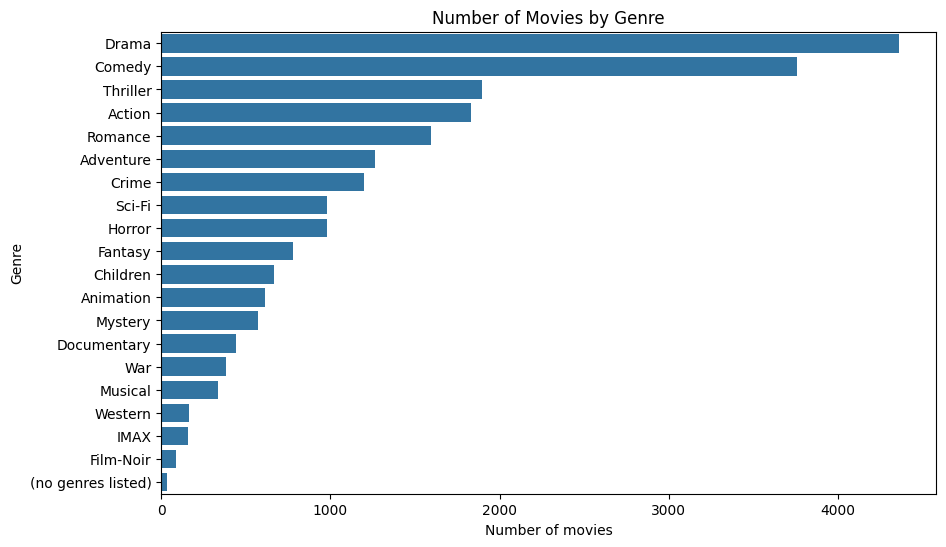


Average rating by genre: 
genres
Film-Noir             3.920115
War                   3.808294
Documentary           3.797785
Crime                 3.658294
Drama                 3.656184
Mystery               3.632460
Animation             3.629937
IMAX                  3.618335
Western               3.583938
Musical               3.563678
Adventure             3.508609
Romance               3.506511
Thriller              3.493706
Fantasy               3.491001
(no genres listed)    3.489362
Sci-Fi                3.455721
Action                3.447984
Children              3.412956
Comedy                3.384721
Horror                3.258195
Name: rating, dtype: float64


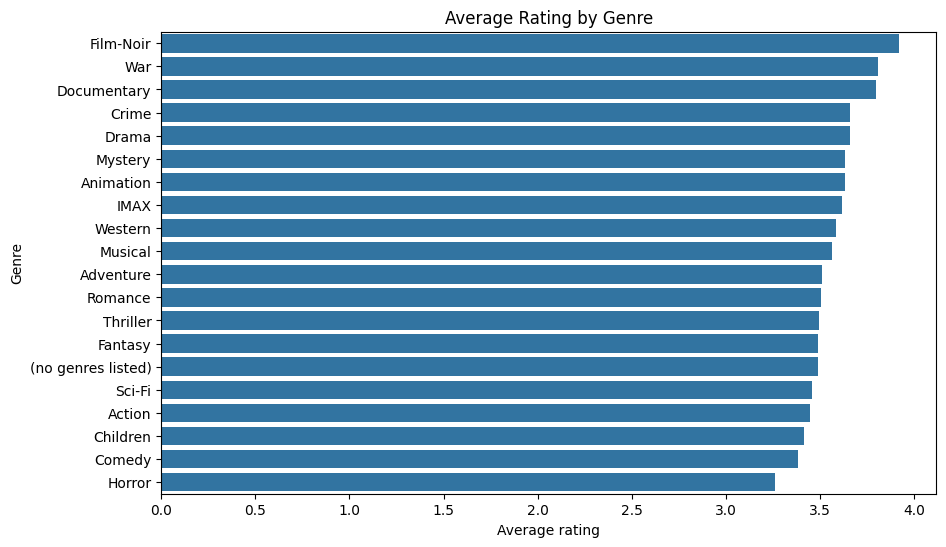

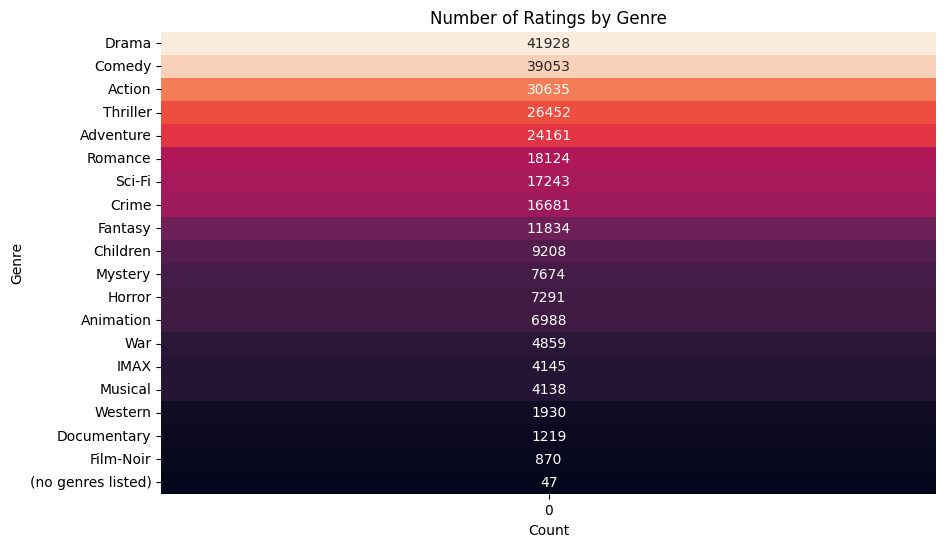

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
base = "/content/drive/MyDrive/projects/movie-ratings-analysis"
movies = pd.read_csv(f"{base}/data/clean_movies.csv")
ratings = pd.read_csv(f"{base}/data/clean_ratings.csv")

# Transforming genres column
movies['genres'] = movies['genres'].str.split('|')
movies_exploded = movies.explode('genres')
print("\nFirst 10 lines after exploding genres: ")
print(movies.head(10))

# Merging movies and ratings
df = ratings.merge(movies_exploded, on="movieId")
print("\nFirst 10 lines after merging: ")
print(df.head(10))

# Number of movies by genre
genre_counts = movies_exploded['genres'].value_counts()
print("\nNumber of movies by genre: ")
print(genre_counts)
plt.figure(figsize=(10,6))
sns.barplot(x=genre_counts.values, y=genre_counts.index)
plt.title("Number of Movies by Genre")
plt.xlabel("Number of movies")
plt.ylabel("Genre")
plt.show()

# Average rating by genre
avg_genre_ratings = df.groupby('genres')['rating'].mean().sort_values(ascending=False)
print("\nAverage rating by genre: ")
print(avg_genre_ratings)
plt.figure(figsize=(10,6))
sns.barplot(x=avg_genre_ratings.values, y=avg_genre_ratings.index)
plt.title("Average Rating by Genre")
plt.xlabel("Average rating")
plt.ylabel("Genre")
plt.show()

# Number of ratings by genre
genre_ratings_counts = df.groupby('genres')['rating'].count().sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.heatmap(genre_ratings_counts.values.reshape(-1,1), annot=True, fmt="d", yticklabels=genre_ratings_counts.index, cbar=False)
plt.title("Number of Ratings by Genre")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()

